# Stack graphs for simulation output

In [1]:
import os
from collections import namedtuple

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

# Seaborn/matplotlib plot settings
sns.set()
sns.set_context('paper', font_scale=2.15)

plt.rcParams["figure.figsize"] = (12,6)
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18
        }
mpl.rc('font', **font)

GenerationType = namedtuple('GenerationType',
                            [
                           'label',
                           'color',
                            ]
                           )
# Colors from MAGMA (R color names)
GENERATION_TYPES = {
    'Z': GenerationType('Battery', '#42F1F4'),  # no color assigned
    'N': GenerationType('Nuclear', '#b22222'),
    'E': GenerationType('Geothermal', '#CDE7B0'),  # no color assigned
    'B': GenerationType('Biomass', '#A3BFA8'),  # no color assigned
    'C': GenerationType('Coal', '#333333'),
    'G': GenerationType('Gas', '#6e8b3d'),
    'O': GenerationType('Oil', '#eea2ad'),
    'H': GenerationType('Hydro', '#add8e6'),
    'W': GenerationType('Wind', '#4f94cd'),
    'S': GenerationType('Solar', '#ffb90f'),
}

FUEL_TO_CODE = {
    'Oil': 'O',
    'Coal': 'C',
    'NG': 'G',
    'Nuclear': 'N',
    'Hydro': 'H',
    'Solar': 'S',
    'Wind': 'W',
               }

In [2]:
def _fuel_type_to_code(x):
    code = FUEL_TO_CODE.get(x, '')
    
    return code

## Grab some simulator output

In [3]:
# case_prefix = '11_12_18_output_dispatchable'
# case_prefix = '11_26_18_sj_low_renewables_15res'
# case_prefix = '11_21_18_sj_inc_renewables_15res'
#case_prefix = '11_29_18_15res'
# case_prefix = '12_12_18_baseline'
# case_prefix = '12_12_18_scen_2'
#case_prefix = '12_12_18_scen_3'
case_prefix = 'rts-gmlc_deterministic'

RESULTS_DIR = os.path.join('data', case_prefix)


# Set the directory to save figures
FIGS_DIR = os.path.join('report', 'figs')

In [4]:
RTS_SOURCE_DIR = os.path.join('..', '..', '..', 'RTS-GMLC', 'RTS_DATA', 'SourceData')
gens_table = pd.read_csv(os.path.join(RTS_SOURCE_DIR, 'gen.csv'))

gens_table['gen type'] = gens_table['Fuel'].apply(_fuel_type_to_code)
gens_table.set_index('GEN UID', inplace=True)
gens_dict = gens_table.to_dict(orient='index')

In [5]:
gens_table['Fuel'].unique()

array(['Oil', 'Coal', 'NG', 'Sync_Cond', 'Nuclear', 'Hydro', 'Solar',
       'Wind', 'Storage'], dtype=object)

In [6]:
hourly_summary = pd.read_csv(os.path.join(RESULTS_DIR, 'hourly_summary.csv'))
hourly_gen_summary = pd.read_csv(os.path.join(RESULTS_DIR, 'Hourly_gen_summary.csv'))
thermal_detail = pd.read_csv(os.path.join(RESULTS_DIR, 'thermal_detail.csv'))
renewables_detail = pd.read_csv(os.path.join(RESULTS_DIR, 'renewables_detail.csv'))

thermal_detail['gen type'] = thermal_detail['Generator'].apply(lambda x: gens_dict[x]['gen type'])
renewables_detail['gen type'] = renewables_detail['Generator'].apply(lambda x: gens_dict[x]['gen type'])

In [7]:
DATE = thermal_detail['Date'].unique()[0]
SAMPLE_DAY = thermal_detail.loc[thermal_detail['Date'] == DATE]

In [8]:
SAMPLE_DAY

,Date,Dispatch,Dispatch DA,Generator,Headroom,Hour,Unit Cost,Unit Market Revenue,Unit State,Unit Uplift Payment,gen type
0,2020-07-10,0.000000,NaN,101_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
1,2020-07-10,0.000000,NaN,101_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
2,2020-07-10,76.000000,NaN,101_STEAM_3,0.000000,1,1596.5700,NaN,1,NaN,C
3,2020-07-10,76.000000,NaN,101_STEAM_4,0.000000,1,1596.5700,NaN,1,NaN,C
4,2020-07-10,0.000000,NaN,102_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
5,2020-07-10,0.000000,NaN,102_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
6,2020-07-10,45.300000,NaN,102_STEAM_3,30.700000,1,1017.5900,NaN,1,NaN,C
7,2020-07-10,45.300000,NaN,102_STEAM_4,30.700000,1,1017.5900,NaN,1,NaN,C
8,2020-07-10,170.000000,NaN,107_CC_1,185.000000,1,4772.5000,NaN,1,NaN,G
9,2020-07-10,0.000000,NaN,113_CT_1,0.000000,1,0.0000,NaN,0,NaN,G


In [9]:
def generate_stack_graph(thermal_data, renewables_data, hourly_summary, gen_summary, bar_width=0.9, title=''):
    """Creates a stack graph."""
    fig, ax = plt.subplots(figsize=(16, 6))

    indices = np.arange(24)
    labels = [str(ix+1) for ix in indices]
    bottom = np.zeros(len(indices))
    
    # Sum the dispatch by gen category for each hour
    def _compute_total_dispatch_per_hour(gen_type):
        total_output_by_hour = []
        
        if gen_type in {'S', 'W', 'H'}:
            gen_details = renewables_data
            
            for h in gen_details['Hour'].unique():
                total_hour_output = gen_details.loc[(gen_details['gen type'] == gen_type) & (gen_details['Hour'] == h)]['Output'].sum()
                total_output_by_hour.append(total_hour_output)
        else:
            gen_details = thermal_data
            
            for h in gen_details['Hour'].unique():
                total_hour_output = gen_details.loc[(gen_details['gen type'] == gen_type) & (gen_details['Hour'] == h)]['Dispatch'].sum()
                total_output_by_hour.append(total_hour_output)
                
        return total_output_by_hour

    # Plot generation dispatch/output.
    # TODO: Accomodate plotting individual generators.
    for gen_type, gen_type_tuple in GENERATION_TYPES.items():
        component_color = gen_type_tuple.color
        vals = _compute_total_dispatch_per_hour(gen_type)
        
        # Skip if none of the generation type is present.
        if sum(vals) <= 0.0:
            continue
        
        # Plot set of bar stack component.
        ax.bar(indices, vals, bar_width, bottom=bottom, color=component_color, label=gen_type_tuple.label)

        # Update "bottom" position for each stack. 
        bottom += vals
    
    # Plot load shedding, if applicable.    
    load_shed_by_hour = hourly_summary[' LoadShedding '].values
    
    if sum(load_shed_by_hour) > 0.0:
        component_color = '#ffff00'
        ax.bar(indices, load_shed_by_hour, bar_width, bottom=bottom, color=component_color, label='Load Shedding')
        bottom += load_shed_by_hour   

    # Plot demand.
    demand_by_hour = hourly_summary[' Demand '].values
    ax.step(indices, demand_by_hour, linewidth=3, color='#000000', where='mid')
    
    # Add reserve shortfalls, if applicable.
    reserve_shortfall_by_hour = hourly_summary[' ReserveShortfall '].values
#     reserve_shortfall_by_hour = np.random.randint(0, 500, size=len(indices))
    
    if sum(reserve_shortfall_by_hour) > 0.0:
        component_color = '#ff00ff'
        ax.bar(indices, reserve_shortfall_by_hour, bar_width, bottom=bottom, color=component_color, label='Reserve Shortfall')
        bottom += reserve_shortfall_by_hour
    
    # Add reserve requirements, if applicable.
    # TODO: Don't have this explicitly in the output files
    reserve_requirements_by_hour = np.zeros(len(indices))
#     reserve_requirements_by_hour = [0.15*hour_demand for hour_demand in demand_by_hour]
    
    if sum(reserve_requirements_by_hour) > 0.0:
        component_color = '#00c2ff'
        ax.bar(indices, reserve_requirements_by_hour, bar_width, bottom=bottom, color=component_color, label='Required Reserve')
        bottom += reserve_requirements_by_hour
    
    # Add implicit reserves, if applicable.
    # TODO:
    reserve_available_by_hour = gen_summary['Available reserves'].values
    implicit_reserves_by_hour = [max(0.0, reserve_available_by_hour[ix] - reserve_requirements_by_hour[ix]) for ix in range(len(reserve_available_by_hour))]

    if sum(reserve_requirements_by_hour) > 0.0:
        component_color = '#00ffc7'
        ax.bar(indices, implicit_reserves_by_hour, bar_width, bottom=bottom, color=component_color, label='Implicit Reserve')
        bottom += implicit_reserves_by_hour
    
    # Add quick-start capacity, if applicable.
    # TODO:
    quickstart_capacity_by_hour = np.zeros(len(indices))
#     quickstart_capacity_by_hour = np.random.randint(0, 500, size=len(indices))
    
    if sum(quickstart_capacity_by_hour) > 0.0:
        component_color = '#494949'
        ax.bar(indices, quickstart_capacity_by_hour, bar_width, bottom=bottom, color=component_color, label='Available Quick Start')
        bottom += quickstart_capacity_by_hour
    
    # TODO:
    quickstart_additional_power_by_hour = np.zeros(len(indices))
#     quickstart_additional_power_by_hour = np.random.randint(0, 400, size=len(indices))
    
    if sum(quickstart_additional_power_by_hour) > 0.0:
        component_color = '#0061ff'
        ax.bar(indices, quickstart_additional_power_by_hour, bar_width, bottom=bottom, color=component_color, hatch='xxx', label='Quick-Start Generator Output')
        bottom += quickstart_capacity_by_hour
        
        mpl.rcParams['hatch.color'] = 'red'
        mpl.rcParams['hatch.linewidth'] = 1.0
    
    # Labels and such.
    plt.xticks(indices, labels, rotation=0)
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine(offset=10, trim=True)

    # Put legend outside on the right.
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(title)
    ax.set_ylabel('Power [MW]')
    ax.set_xlabel('Hour')
    ax.yaxis.grid(True)

    return fig, ax

## Sample stack graph

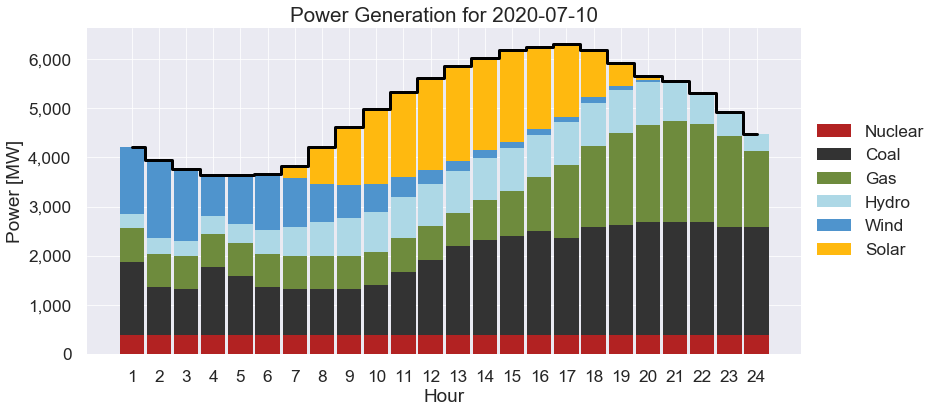

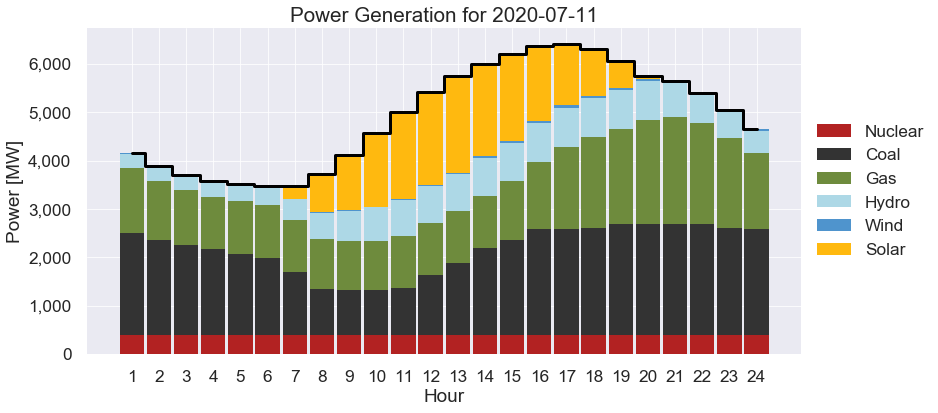

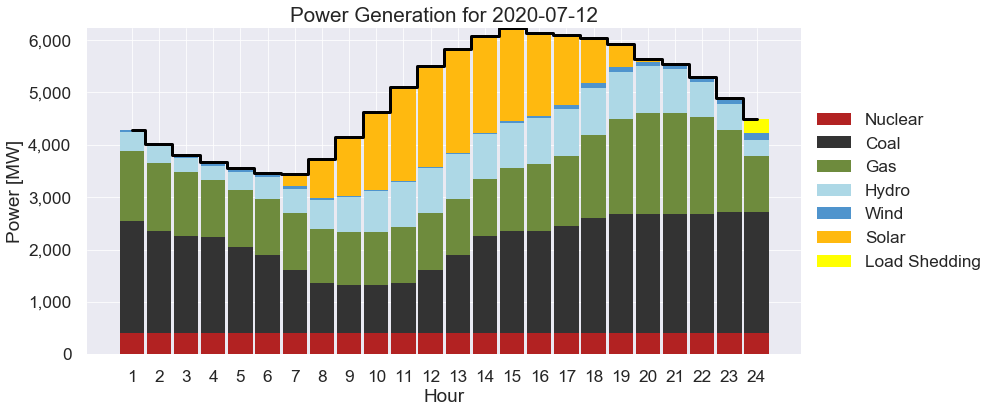

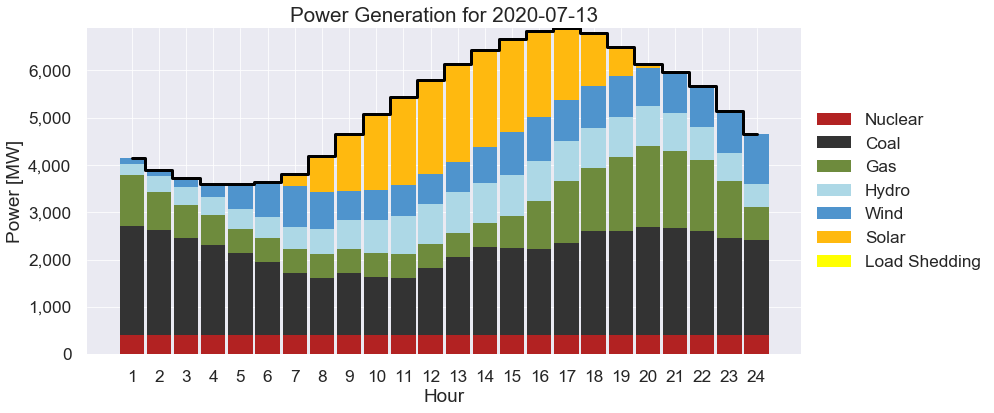

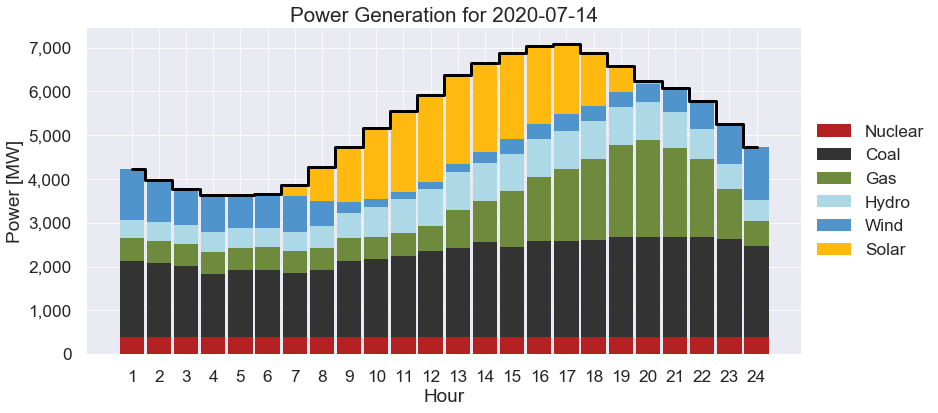

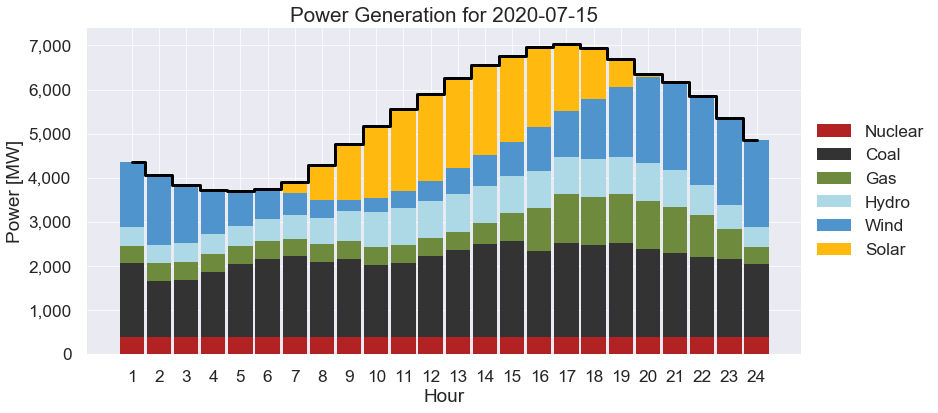

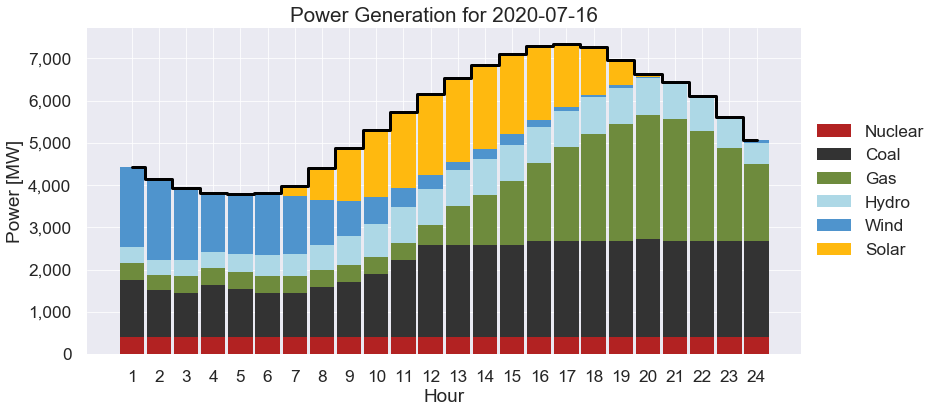

In [10]:
for date in thermal_detail['Date'].unique():
    # Generate sample data for the day
    SAMPLE_THERMAL = thermal_detail.loc[thermal_detail['Date'] == date]
    SAMPLE_RENEWABLES = renewables_detail.loc[renewables_detail['Date'] == date]
    SAMPLE_HOURLY = hourly_summary.loc[hourly_summary['Date '] == date]
    SAMPLE_GENS = hourly_gen_summary.loc[hourly_gen_summary['Date'] == date]
    
    generate_stack_graph(SAMPLE_THERMAL, SAMPLE_RENEWABLES, SAMPLE_HOURLY, SAMPLE_GENS, title='Power Generation for {0}'.format(date))

In [11]:
np.append(thermal_detail['Generator'].unique(), renewables_detail['Generator'].unique())

array(['101_CT_1', '101_CT_2', '101_STEAM_3', '101_STEAM_4', '102_CT_1',
       '102_CT_2', '102_STEAM_3', '102_STEAM_4', '107_CC_1', '113_CT_1',
       '113_CT_2', '113_CT_3', '113_CT_4', '115_STEAM_1', '115_STEAM_2',
       '115_STEAM_3', '116_STEAM_1', '118_CC_1', '121_NUCLEAR_1',
       '123_CT_1', '123_CT_4', '123_CT_5', '123_STEAM_2', '123_STEAM_3',
       '201_CT_1', '201_CT_2', '201_STEAM_3', '202_CT_1', '202_CT_2',
       '202_STEAM_3', '202_STEAM_4', '207_CT_1', '207_CT_2', '213_CC_3',
       '213_CT_1', '213_CT_2', '215_CT_4', '215_CT_5', '216_STEAM_1',
       '218_CC_1', '221_CC_1', '223_CT_4', '223_CT_5', '223_CT_6',
       '223_STEAM_1', '223_STEAM_2', '223_STEAM_3', '301_CT_1', '301_CT_2',
       '301_CT_3', '301_CT_4', '302_CT_1', '302_CT_2', '302_CT_3',
       '302_CT_4', '307_CT_1', '307_CT_2', '313_CC_1', '315_CT_6',
       '315_CT_7', '315_CT_8', '315_STEAM_1', '315_STEAM_2', '315_STEAM_3',
       '315_STEAM_4', '315_STEAM_5', '316_STEAM_1', '318_CC_1', '321_CC_1',


In [17]:
import json
import math

from pyomo.opt import SolverFactory, TerminationCondition
from pyomo.core.plugins.transform.relax_integrality \
        import RelaxIntegrality
from egret.models.unit_commitment import *
from egret.data.model_data import ModelData

In [22]:
test_cases = [os.path.join('..', 'models', 'tests', 'uc_test_instances', 'test_case_{}.json'.format(i)) for i in range(1,2)]
test_int_objvals = [4201915.017320504, 5454367.7670904165, 5999272.361123627, 5461120.3231092375, 6062406.32677043]

for test_case, ref_objval in zip(test_cases, test_int_objvals):
    
    md_dict = json.load(open(test_case,'r'))
    md = ModelData(md_dict)

    model = create_tight_unit_commitment_model(md, relaxed=True)
    opt = SolverFactory('cbc')

    result = opt.solve(model, tee=False)

    assert result.solver.termination_condition == TerminationCondition.optimal
#     assert math.isclose(ref_objval, result.problem.upper_bound)

In [35]:
for gen in model.ThermalGenerators:
    for time_period in model.TimePeriods:
        print(gen, time_period, model.PowerGenerated[gen, time_period].expr())

GEN1_0_t 1 455.0
GEN1_0_t 2 455.0
GEN1_0_t 3 455.0
GEN1_0_t 4 455.0
GEN1_0_t 5 455.0
GEN1_0_t 6 455.0
GEN1_0_t 7 455.0
GEN1_0_t 8 455.0
GEN1_0_t 9 455.0
GEN1_0_t 10 455.0
GEN1_0_t 11 455.0
GEN1_0_t 12 455.0
GEN1_0_t 13 455.0
GEN1_0_t 14 455.0
GEN1_0_t 15 455.0
GEN1_0_t 16 455.0
GEN1_0_t 17 455.0
GEN1_0_t 18 455.0
GEN1_0_t 19 455.0
GEN1_0_t 20 455.0
GEN1_0_t 21 455.0
GEN1_0_t 22 455.0
GEN1_0_t 23 455.0
GEN1_0_t 24 455.0
GEN1_1_t 1 455.0
GEN1_1_t 2 455.0
GEN1_1_t 3 455.0
GEN1_1_t 4 455.0
GEN1_1_t 5 455.0
GEN1_1_t 6 455.0
GEN1_1_t 7 455.0
GEN1_1_t 8 455.0
GEN1_1_t 9 455.0
GEN1_1_t 10 455.0
GEN1_1_t 11 455.0
GEN1_1_t 12 455.0
GEN1_1_t 13 455.0
GEN1_1_t 14 455.0
GEN1_1_t 15 455.0
GEN1_1_t 16 455.0
GEN1_1_t 17 455.0
GEN1_1_t 18 455.0
GEN1_1_t 19 455.0
GEN1_1_t 20 455.0
GEN1_1_t 21 455.0
GEN1_1_t 22 455.0
GEN1_1_t 23 455.0
GEN1_1_t 24 455.0
GEN1_10_t 1 230.0
GEN1_10_t 2 53.333334
GEN1_10_t 3 0.0
GEN1_10_t 4 0.0
GEN1_10_t 5 0.0
GEN1_10_t 6 0.0
GEN1_10_t 7 0.0
GEN1_10_t 8 0.0
GEN1_10_t 9 0.0
GE

GEN6_2_t 8 20.0
GEN6_2_t 9 20.0
GEN6_2_t 10 80.0
GEN6_2_t 11 80.0
GEN6_2_t 12 80.0
GEN6_2_t 13 80.0
GEN6_2_t 14 80.0
GEN6_2_t 15 64.93562800000001
GEN6_2_t 16 20.0
GEN6_2_t 17 20.0
GEN6_2_t 18 80.0
GEN6_2_t 19 80.0
GEN6_2_t 20 80.0
GEN6_2_t 21 80.0
GEN6_2_t 22 80.0
GEN6_2_t 23 80.0
GEN6_2_t 24 20.0
GEN6_3_t 1 0.0
GEN6_3_t 2 0.0
GEN6_3_t 3 0.0
GEN6_3_t 4 0.0
GEN6_3_t 5 0.0
GEN6_3_t 6 0.0
GEN6_3_t 7 0.0
GEN6_3_t 8 20.0
GEN6_3_t 9 20.0
GEN6_3_t 10 40.127832999999995
GEN6_3_t 11 20.0
GEN6_3_t 12 0.0
GEN6_3_t 13 0.0
GEN6_3_t 14 0.0
GEN6_3_t 15 0.0
GEN6_3_t 16 0.0
GEN6_3_t 17 20.0
GEN6_3_t 18 80.0
GEN6_3_t 19 80.0
GEN6_3_t 20 80.0
GEN6_3_t 21 20.0
GEN6_3_t 22 0.0
GEN6_3_t 23 0.0
GEN6_3_t 24 0.0


In [39]:
md.attributes('generators')

None
